In [1]:
# Importing the libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

%matplotlib inline
import matplotlib.pyplot as plt
import pylab as pl
from matplotlib.colors import ListedColormap
import seaborn as sns
import itertools
from itertools import combinations

import warnings

from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score 
from xgboost.sklearn import XGBClassifier
from lightgbm.sklearn import LGBMClassifier
from lightgbm.sklearn import LGBMRegressor
from sklearn import neighbors, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, validation_curve
from sklearn.base import clone
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, learning_curve, ShuffleSplit 
from sklearn import linear_model 
from sklearn.metrics import roc_curve, auc, mean_squared_error, f1_score
from sklearn import preprocessing
import keras
import xgboost as xgb
import lightgbm as lgb
import keras
from keras.models import Sequential
from keras.layers import Dense
np.random.seed(42)

Using TensorFlow backend.


In [2]:
# Importing the dataset
df = pd.read_csv('C:/Users/banva/Desktop/MSBA/MSBA Projects/HR Employee Attrition/hr_employee_Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

In [4]:
df.dtypes
#Mapping to 1 and 0. Attrition, Gender, OverTime 
#remove EmployeeNumber, EmployeeCount, Over18
#Dummy EducationField, Department , BusinessTravel, JobRole , MaritalStatus 

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

## Data Explration

In [5]:
df.shape

(1470, 35)

In [6]:
print(df.describe(include = "all"))

                Age Attrition BusinessTravel    DailyRate  \
count   1470.000000      1470           1470  1470.000000   
unique          NaN         2              3          NaN   
top             NaN        No  Travel_Rarely          NaN   
freq            NaN      1233           1043          NaN   
mean      36.923810       NaN            NaN   802.485714   
std        9.135373       NaN            NaN   403.509100   
min       18.000000       NaN            NaN   102.000000   
25%       30.000000       NaN            NaN   465.000000   
50%       36.000000       NaN            NaN   802.000000   
75%       43.000000       NaN            NaN  1157.000000   
max       60.000000       NaN            NaN  1499.000000   

                    Department  DistanceFromHome    Education EducationField  \
count                     1470       1470.000000  1470.000000           1470   
unique                       3               NaN          NaN              6   
top     Research & Developm

In [7]:
# Check for missing values
df.isnull().any().sum()

0

In [8]:
#Target Variable distribution
target=df['Attrition']
df.Attrition.value_counts()
type(df.Attrition)

pandas.core.series.Series

## Feature Engineering

In [9]:
#Map these variables Attrition, Gender, OverTime 
df['Attrition']=df['Attrition'].map({'Yes':'1' ,'No':'0' })
df['Attrition'] = df['Attrition'].astype(np.int32)
df['Gender']=df['Gender'].map({'Male':'1' ,'Female':'0' })
df['Gender'] = df['Gender'].astype(np.int32)
df['OverTime']=df['OverTime'].map({'Yes':'1' ,'No':'0' })
df['OverTime'] = df['OverTime'].astype(np.int32)

In [10]:
#Dropping columns
del_columns = ['EmployeeNumber', 'EmployeeCount', 'Over18']
df= df.drop(columns=del_columns)
df.shape

(1470, 32)

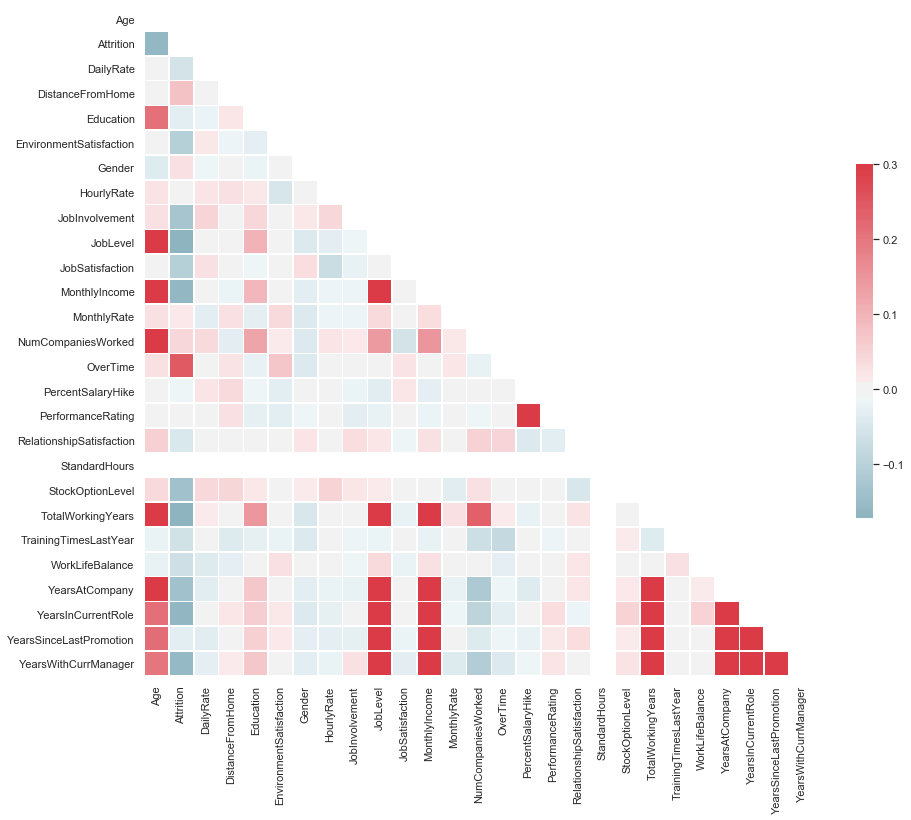

In [11]:
#Plot Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15,13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [12]:
############################## Drop Highly Correlated Features #############################
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
df = df.drop(to_drop, axis=1)
df.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int32 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   int32 
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [12]:
#Dummy variables
df = pd.get_dummies(df, drop_first=True)
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int32
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   Gender                             1470 non-null   int32
 7   HourlyRate                         1470 non-null   int64
 8   JobInvolvement                     1470 non-null   int64
 9   JobLevel                           1470 non-null   int64
 10  JobSatisfaction                    1470 non-null   int64
 11  MonthlyIncome                      1470 non-null   int64
 12  MonthlyRate         

In [13]:
# data resampling to make positive : negative as 2:8

# get the distribution
count_0,count_1 = df.Attrition.value_counts()

data_0 = df[df['Attrition'] == 0]
data_1 = df[df['Attrition'] == 1]


#Upsample data_1
data_1 = data_1.sample(int(count_1*1.5) ,replace=True, random_state=42)
#Downsample data_0
data_0 = data_0.sample(int(count_0*0.9) ,replace=True, random_state=42)

# get the complete dataset
df = pd.concat([data_0 ,data_1] ,axis=0)

df.shape

(1464, 46)

## Modeling

In [14]:
# retrieving Attributes and train test split
y = df.loc[:,'Attrition']
X = df.drop(['Attrition'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = X_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [15]:
type(y_train)

pandas.core.series.Series

In [17]:
y_test.value_counts()

0    334
1    106
Name: Attrition, dtype: int64

In [40]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [41]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score 
np.random.seed(42)
inner_cv = KFold(n_splits=5, shuffle=True, random_state = 42) 
outer_cv = KFold(n_splits=5, shuffle=True, random_state = 42)

In [48]:
# plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Function to calculate accuracy and plot confusion matrix 
def cal_accuracy(y_test, y_pred): 
      
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report : ", 
    classification_report(y_test, y_pred)) 
    
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)

    cnf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix,classes=["1","0"],
                      title='Confusion matrix, without normalization')
    
    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=["1","0"], normalize=True,
                      title='Normalized confusion matrix')
    
    plt.show()

In [49]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [38]:
############################## Function for Learning Curves ##############################

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10)):

    plt.figure()                    #display figure
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples") #y label title
    plt.ylabel("Score")             #x label title
    
    # Class learning_curve determines cross-validated training and test scores for different training set sizes
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    # Cross validation statistics for training and testing data (mean and standard deviation)
    train_scores_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
    train_scores_std = np.std(train_scores, axis=1)   # Compute the standard deviation along the specified axis.
    test_scores_mean = np.mean(test_scores, axis=1)   # Compute the arithmetic mean along the specified axis.
    test_scores_std = np.std(test_scores, axis=1)     # Compute the standard deviation along the specified axis.

    plt.grid() # Configure the grid lines

    # Fill the area around the line to indicate the size of standard deviations for the training data
    # and the test data
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r") # train data performance indicated with red
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g") # test data performance indicated with green
    
    # Cross-validation means indicated by dots
    # Train data performance indicated with red
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    # Test data performance indicated with green
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best") # Show legend of the plot at the best location possible
    return plt             # Function that returns the plot as an output

## Naive Rule

## Lasso Regression

## Decision Tree

In [43]:
####################################### Decision Tree Model #####################################
from sklearn.tree import DecisionTreeClassifier 
param_test={'max_depth': [2,5,8,10,15],
                              'max_leaf_nodes': range(10,100,10),
                              'min_impurity_decrease': [0.1, 0.01, 0.001]}

gs_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                  param_grid=param_test,
                  scoring='precision',
                  cv=inner_cv)

gs_dt = gs_dt.fit(X_train,y_train)
print(" Parameter Tuning for Decision Tree")
print("Non-nested CV precision: ", gs_dt.best_score_)
print("Optimal Parameter: ", gs_dt.best_params_)    # Parameter setting that gave the best results on the hold out data.
print("Optimal Estimator: ", gs_dt.best_estimator_) # Estimator that was chosen by the search, i.e. estimator which gave highest score


C:\Users\banva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\banva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\banva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\banva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision 

C:\Users\banva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\banva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\banva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\banva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision 

C:\Users\banva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\banva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\banva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\banva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision 

C:\Users\banva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\banva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\banva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\banva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision 

C:\Users\banva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\banva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\banva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\banva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision 

C:\Users\banva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\banva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\banva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\banva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision 

C:\Users\banva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\banva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\banva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\banva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision 

C:\Users\banva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\banva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\banva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\banva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision 

 Parameter Tuning for Decision Tree
Non-nested CV precision:  0.8393650793650794
Optimal Parameter:  {'max_depth': 2, 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.001}
Optimal Estimator:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')


C:\Users\banva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\banva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\banva\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


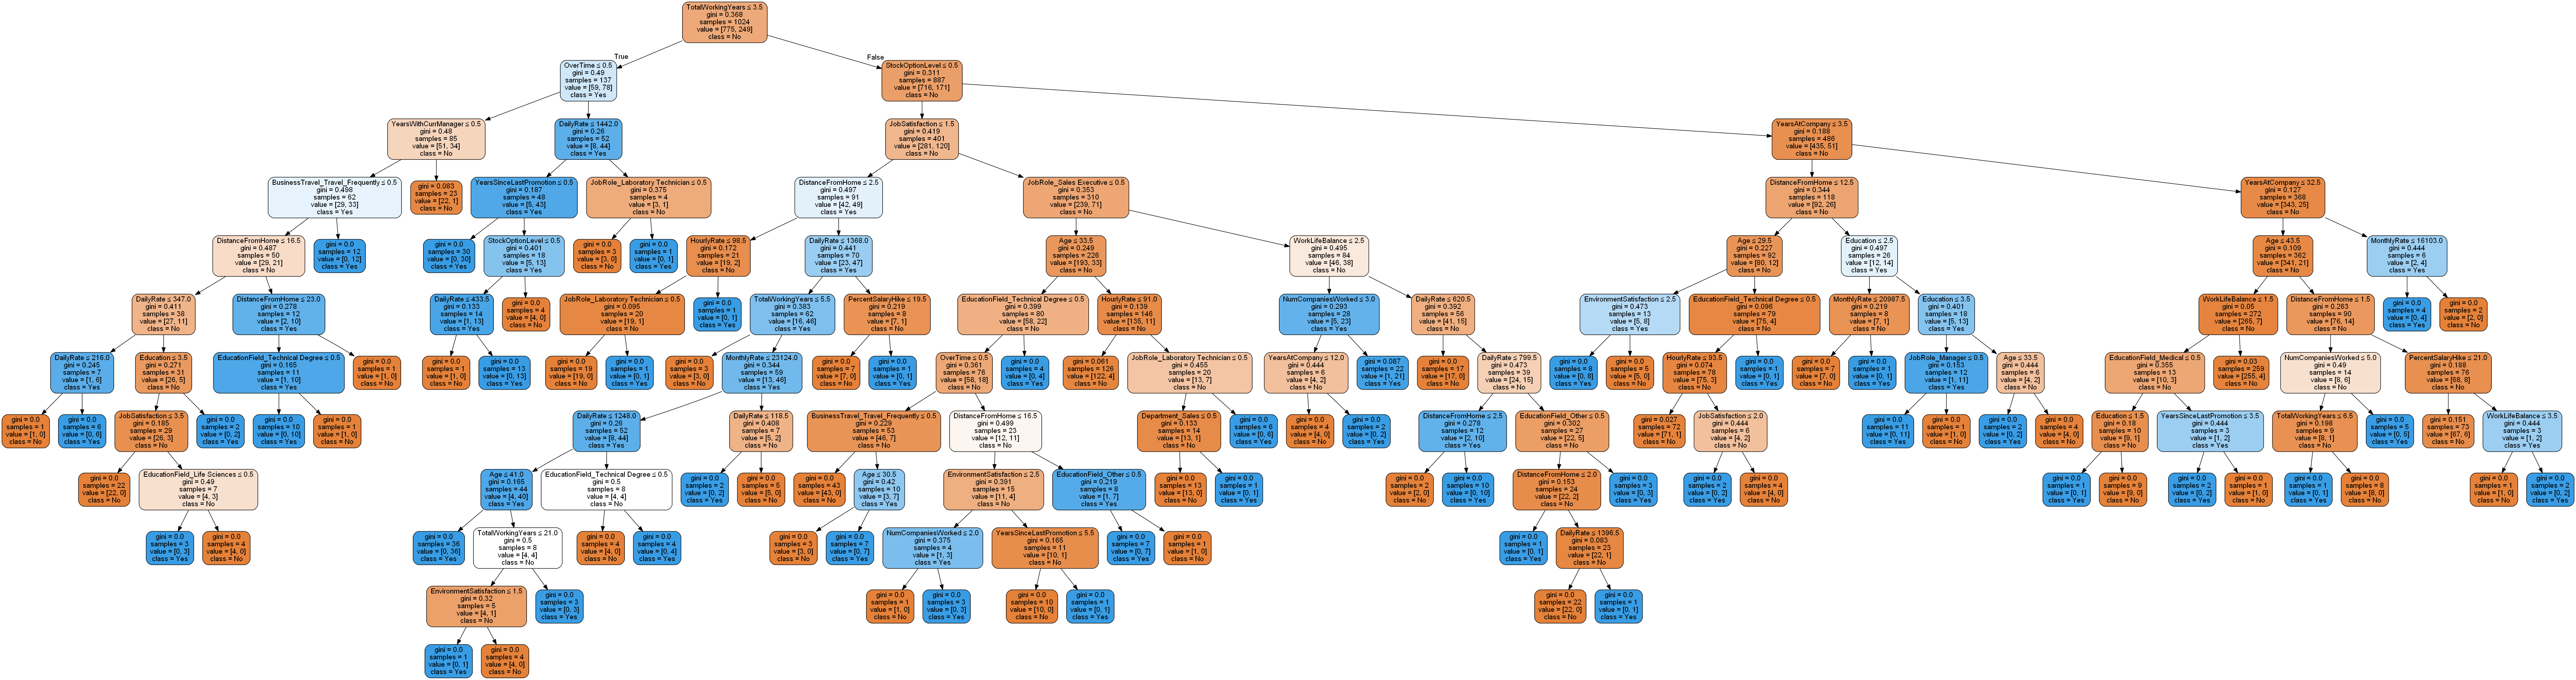

In [80]:
import pydotplus
import graphviz
import sklearn.tree as tree

from sklearn.externals.six import StringIO 
from IPython.display import Image
dot_data = StringIO()

clf = gs_dt.best_estimator_
clf.fit(X_train, y_train)

tree.export_graphviz(clf, 
 out_file=dot_data, 
 class_names=['No', 'Yes'], # the target names.
 feature_names=X_train.columns, # the feature names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [81]:
nested_score_gs_dt = cross_val_score(gs_dt, X=X_train, y=y_train, cv=outer_cv) # the score is an array, score of the model in each outer  # for the best parameters
print("Nested CV f1: ",nested_score_gs_dt.mean(), " +/- ", nested_score_gs_dt.std())

Nested CV f1:  0.852544237207078  +/-  0.0055511210880349075


Accuracy :  79.54545454545455
Report :                precision    recall  f1-score   support

           0       0.85      0.88      0.87       334
           1       0.59      0.52      0.55       106

    accuracy                           0.80       440
   macro avg       0.72      0.70      0.71       440
weighted avg       0.79      0.80      0.79       440

Confusion matrix, without normalization
[[295  39]
 [ 51  55]]
Normalized confusion matrix
[[0.88 0.12]
 [0.48 0.52]]


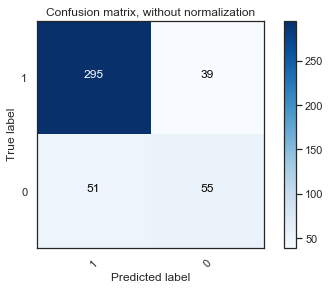

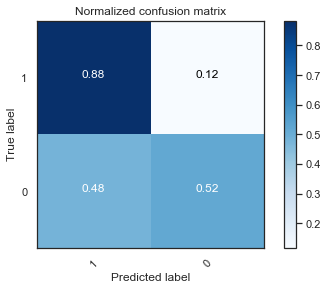

None
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       334
           1       0.59      0.52      0.55       106

    accuracy                           0.80       440
   macro avg       0.72      0.70      0.71       440
weighted avg       0.79      0.80      0.79       440

Accuracy: 0.79545
F1 score: 0.70882


In [50]:
# DT Classifier
clf_dt = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.001, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

# Make predictions 
clf_dt = clf_dt.fit(X_train, y_train) 
y_pred = clf_dt.predict(X_test) 

# calculate accuracy and plot confusion matrix
print(cal_accuracy(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print('Accuracy: %.5f' % accuracy_score(y_test, y_pred))
print('F1 score: %.5f' % f1_score(y_test, y_pred, average='macro'))

## SBS

In [51]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

train_sbs_dt = X_train
classifier_sbs = DecisionTreeClassifier().fit(train_sbs_dt, y_train) 
mod = SelectFromModel(classifier_sbs, prefit=True)

mod.transform(train_sbs_dt)

print('Number of features selected: ', len(train_sbs_dt.columns[list(mod.get_support())]))
print('Features selected: ', train_sbs_dt.columns[list(mod.get_support())] )

Number of features selected:  18
Features selected:  Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobSatisfaction',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'StockOptionLevel',
       'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany',
       'BusinessTravel_Travel_Frequently', 'EducationField_Technical Degree',
       'JobRole_Laboratory Technician', 'JobRole_Sales Executive'],
      dtype='object')


In [52]:
features_select_dt_sbs = train_sbs_dt.columns[list(mod.get_support())]

X_train_select_dt_sbs = train_sbs_dt[features_select_dt_sbs]
X_test_select_dt_sbs = X_test[features_select_dt_sbs]

Confusion matrix, without normalization
[[302  32]
 [ 25  81]]
              precision    recall  f1-score   support

          No       0.92      0.90      0.91       334
         Yes       0.72      0.76      0.74       106

    accuracy                           0.87       440
   macro avg       0.82      0.83      0.83       440
weighted avg       0.87      0.87      0.87       440

Accuracy: 0.87045
F1 score: 0.82675


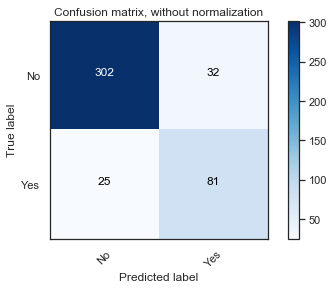

In [53]:
###################################### For Feature Selection Method ############################
gs_dt_sbs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                  param_grid=[{'max_depth': [2,5,8,10,15],
                              'max_leaf_nodes': range(10,100,10),
                              'min_impurity_decrease': [0.1, 0.01, 0.001]}],
                  scoring='accuracy',
                  cv=inner_cv)

gs_dt_sbs = gs_dt_sbs.fit(X_train_select_dt_sbs,y_train)

y_pred =  gs_dt_sbs.best_estimator_.predict(X_test_select_dt_sbs)

# plot confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No','Yes'],title='Confusion matrix, without normalization')

print(classification_report(y_test, y_pred, target_names=['No','Yes']))

print('Accuracy: %.5f' % accuracy_score(y_test, y_pred))
print('F1 score: %.5f' % f1_score(y_test, y_pred, average='macro'))

## RFE

In [54]:
############################# Recursive Feature Elimination ##############################333
# Load libraries
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFECV
from sklearn import datasets, linear_model
import warnings

# Suppress an annoying but harmless warning
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
classifier = DecisionTreeClassifier()
rfecv = RFECV(estimator=classifier, step=1, scoring='neg_mean_squared_error')

train_rfe_dt= X_train
# Fit recursive feature eliminator 
rfecv.fit(train_rfe_dt, y_train)

# Recursive feature elimination
rfecv.transform(train_rfe_dt)

print('Number of features selected: ', rfecv.n_features_)
print('Features selected: ',list(train_rfe_dt.columns[list(rfecv.support_)]) )

Number of features selected:  11
Features selected:  ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany']


In [55]:
features_select_dt_rfe = list(train_rfe_dt.columns[list(rfecv.support_)])

X_train_select_dt_rfe = train_rfe_dt[features_select_dt_rfe]
X_test_select_dt_rfe = X_test[features_select_dt_rfe]

print(X_train_select_dt_rfe.shape)
print(X_test_select_dt_rfe.shape)

(1024, 11)
(440, 11)


Confusion matrix, without normalization
[[305  29]
 [ 37  69]]
              precision    recall  f1-score   support

          No       0.89      0.91      0.90       334
         Yes       0.70      0.65      0.68       106

    accuracy                           0.85       440
   macro avg       0.80      0.78      0.79       440
weighted avg       0.85      0.85      0.85       440

Accuracy: 0.85000
F1 score: 0.78942


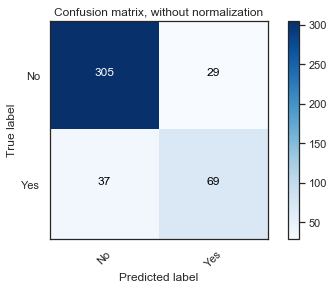

In [56]:
###################################### For Feature Selection Method ############################
gs_dt_rfe = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                  param_grid=[{'max_depth': [2,5,8,10,15],
                              'max_leaf_nodes': range(10,100,10),
                              'min_impurity_decrease': [0.1, 0.01, 0.001]}],
                  scoring='accuracy',
                  cv=inner_cv)

gs_dt_rfe = gs_dt_rfe.fit(X_train_select_dt_rfe , y_train)

y_pred =  gs_dt_rfe.best_estimator_.predict(X_test_select_dt_rfe)

# plot confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No','Yes'],title='Confusion matrix, without normalization')

print(classification_report(y_test, y_pred, target_names=['No','Yes']))

print('Accuracy: %.5f' % accuracy_score(y_test, y_pred))
print('F1 score: %.5f' % f1_score(y_test, y_pred, average='macro'))

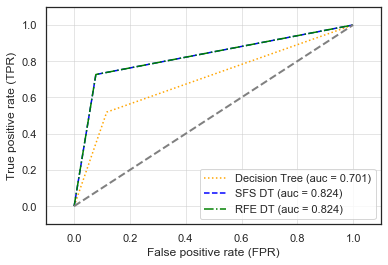

In [62]:
# Decision Tree Classifier
#clf_dt = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       #max_depth=8, max_features=None, max_leaf_nodes=20,
                       #min_impurity_decrease=0.001, min_impurity_split=None,
                       #min_samples_leaf=1, min_samples_split=2,
                       #min_weight_fraction_leaf=0.0, presort='deprecated',
                       #random_state=42, splitter='best')

# Logistic Regression 
#clf_lr = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   #intercept_scaling=1, l1_ratio=None, max_iter=100,
                   #multi_class='auto', n_jobs=None, penalty='l2',
                   #random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   #warm_start=False)

# Naive Bayes Classifier
#clf_nb = GaussianNB()

#Random Forrest classifier
#clf_rf = RandomForestClassifier()

#clf_knn =neighbors.KNeighborsClassifier(n_neighbors = 17)
                                        
# Label the classifiers
clf_labels = [ 'Decision Tree', 'SFS DT' ,'RFE DT']
all_clf = [ clf_dt, gs_dt_sbs, gs_dt_rfe]

# visualization   
colors = [ 'orange', 'blue', 'green'  ]      # Colors for visualization
linestyles = [':', '--', '-.', '-'  ]        # Line styles for visualization
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):

    # Assuming the label of the positive class is 1 and data is normalized
    clf = clf.fit(X_train_std,y_train)
    y_pred = clf.predict(X_test_std)     
    
    fpr, tpr, thresholds = roc_curve(y_true=y_test, # Build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)                # Compute Area Under the Curve (AUC) 
    plt.plot(fpr, tpr,                         # Plot ROC Curve and create label with AUC values
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.3f)' % (label, roc_auc))

plt.legend(loc='lower right')    # Where to place the legend
plt.plot([0, 1], [0, 1], # Visualize random classifier
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

plt.show()